In [1]:

pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.9/989.9 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


**Importing Libraries**

In [2]:
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
import visualkeras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import Input, Model
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, Dense, Concatenate, Dropout, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.utils import plot_model
#from model_utility import plot_images

**Initializing Iterations and Learning Rate**

In [3]:
EPOCHS = 15
LR = 0.001


**Calling the Splitted Data**

In [4]:
BASE_DIR = "/kaggle/input/plant-deseas/data/"
Test_Dir = "/kaggle/input/testing-data/"
TRAIN_DIR = os.path.join(BASE_DIR, "train")
VAL_DIR = os.path.join(BASE_DIR, "valid")
TEST_DIR = os.path.join(Test_Dir, "test")
IMG_SHAPE  = (256, 256)
BATCH_SIZE = 16
print("done")

done


**Generation of Data**

In [5]:
genereator = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 15,
        width_shift_range = 0.05,
        height_shift_range = 0.05,
        shear_range = 0.05,
        zoom_range = 0.05,
        horizontal_flip = True,
        vertical_flip = True,
        fill_mode = 'reflect'
    )

**Training Data**

In [6]:
train_data = genereator.flow_from_directory(
        batch_size = BATCH_SIZE,
        directory = TRAIN_DIR,
        shuffle = True,
        target_size = IMG_SHAPE
    )

Found 18255 images belonging to 10 classes.


**Validation Data**


In [7]:
val_data = genereator.flow_from_directory(
        batch_size = BATCH_SIZE,
        directory = VAL_DIR,
        shuffle = True,
        target_size = IMG_SHAPE
    )

Found 4585 images belonging to 10 classes.


**CNN based Model Version 1 (V1)**

In [8]:
model = tf.keras.models.Sequential([

tf.keras.layers.Conv2D(16, (7,7), activation="LeakyReLU", input_shape=(256, 256, 3)),

tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(32, (3,3), activation="LeakyReLU"),

tf.keras.layers.MaxPooling2D(2,2),
    
tf.keras.layers.Conv2D(64, (1,1), activation="LeakyReLU"),

tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(128, (3,3), activation="LeakyReLU"),

tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(256, (7,7), activation="LeakyReLU"),

tf.keras.layers.MaxPooling2D(2,2),
    
tf.keras.layers.Conv2D(512, (3,3), activation="LeakyReLU"),

tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.BatchNormalization(),
tf.keras.layers. Flatten(),
                       
tf.keras.layers.Dense(256, activation="LeakyReLU"),
tf.keras.layers.Dropout(0.2),

tf.keras.layers.Dense(128, activation="LeakyReLU"),
tf.keras.layers.Dropout(0.2),                       
#tf.keras.layers.Dense(128, activation="relu"),
tf.keras.layers.Dense (10, activation= "softmax")
])

2023-01-09 05:06:22.921408: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-09 05:06:23.128424: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-09 05:06:23.129289: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-09 05:06:23.130993: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

**CNN based Model Version 2 (V2)**

In [9]:
# model = tf.keras.models.Sequential([

# tf.keras.layers.Conv2D(16, (7,7), padding="same", activation="LeakyReLU", input_shape=(256, 256, 3)),
# tf.keras.layers.Conv2D(16, (7,7), padding="same", activation="LeakyReLU"),
# tf.keras.layers.BatchNormalization(),
# tf.keras.layers.MaxPooling2D(2,2),

# tf.keras.layers.Conv2D(32, (3,3), padding="same", activation="LeakyReLU"),
# tf.keras.layers.Conv2D(32, (3,3), padding="same", activation="LeakyReLU"),
# tf.keras.layers.BatchNormalization(),
# tf.keras.layers.MaxPooling2D(2,2),
    
# tf.keras.layers.Conv2D(64, (1,1), padding="same", activation="LeakyReLU"),
# tf.keras.layers.Conv2D(64, (1,1), padding="same", activation="LeakyReLU"),
# tf.keras.layers.BatchNormalization(),
# tf.keras.layers.MaxPooling2D(2,2),

# tf.keras.layers.Conv2D(128, (3,3), padding="same", activation="LeakyReLU"),
# tf.keras.layers.Conv2D(128, (3,3), padding="same", activation="LeakyReLU"),
# tf.keras.layers.BatchNormalization(),
# tf.keras.layers.MaxPooling2D(2,2),

# tf.keras.layers.Conv2D(256, (7,7), padding="same", activation="LeakyReLU"),
# tf.keras.layers.Conv2D(256, (7,7), padding="same", activation="LeakyReLU"),
# tf.keras.layers.BatchNormalization(),
# tf.keras.layers.MaxPooling2D(2,2),

# tf.keras.layers.Conv2D(512, (3,3), padding="same", activation="LeakyReLU"),
# tf.keras.layers.Conv2D(512, (3,3), padding="same", activation="LeakyReLU"),
# tf.keras.layers.BatchNormalization(),
# tf.keras.layers.MaxPooling2D(2,2),

# tf.keras.layers. Flatten(),
                       
# tf.keras.layers.Dense(128, activation="LeakyReLU"),
# tf.keras.layers.BatchNormalization(),
# tf.keras.layers.Dropout(0.2),

# tf.keras.layers.Dense(128, activation="LeakyReLU"),
# tf.keras.layers.BatchNormalization(),
# tf.keras.layers.Dropout(0.2),

# tf.keras.layers.Dense (10, activation= "softmax")
# ])

**Summary of Model**

In [10]:
# model = KHKModel()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 250, 16)      2368      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 123, 123, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        2112      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       7

**Visualising the CNN Architecture**

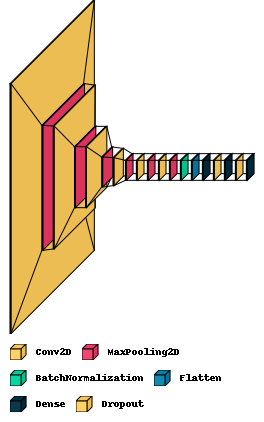

In [11]:
visualkeras.layered_view(model,legend=True,scale_xy=1, scale_z=1, max_z=1)

**Compiling the Model**


In [12]:
metrics = ['accuracy',Recall(), Precision()]
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(), metrics=metrics)

**Initializing Early Stop for Model**

In [13]:
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=False)]

**Fitting the Model**

In [14]:
history = model.fit(train_data,epochs = EPOCHS,validation_data = val_data,callbacks = callbacks)

2023-01-09 05:06:26.517039: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2023-01-09 05:06:28.831936: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1141/1141 [==============================] - 444s 383ms/step - loss: 1.3668 - accuracy: 0.5383 - recall: 0.4205 - precision: 0.6495 - val_loss: 1.9577 - val_accuracy: 0.4761 - val_recall: 0.4417 - val_precision: 0.5287
Epoch 2/15
1141/1141 [==============================] - 356s 312ms/step - loss: 0.8077 - accuracy: 0.7168 - recall: 0.6561 - precision: 0.7744 - val_loss: 1.2383 - val_accuracy: 0.6188 - val_recall: 0.5871 - val_precision: 0.6544
Epoch 3/15
1141/1141 [==============================] - 357s 313ms/step - loss: 0.6071 - accuracy: 0.7905 - recall: 0.7506 - precision: 0.8278 - val_loss: 0.8187 - val_accuracy: 0.7422 - val_recall: 0.7219 - val_precision: 0.7637
Epoch 4/15
1141/1141 [==============================] - 354s 310ms/step - loss: 0.5120 - accuracy: 0.8245 - recall: 0.7962 - precision: 0.8505 - val_loss: 0.9131 - val_accuracy: 0.6957 - val_recall: 0.6711 - val_precision: 0.7414
Epoch 5/15
1141/1141 [==============================] - 358s 314ms/step - loss: 0.4274 - ac

**Evaluating Accuracy**

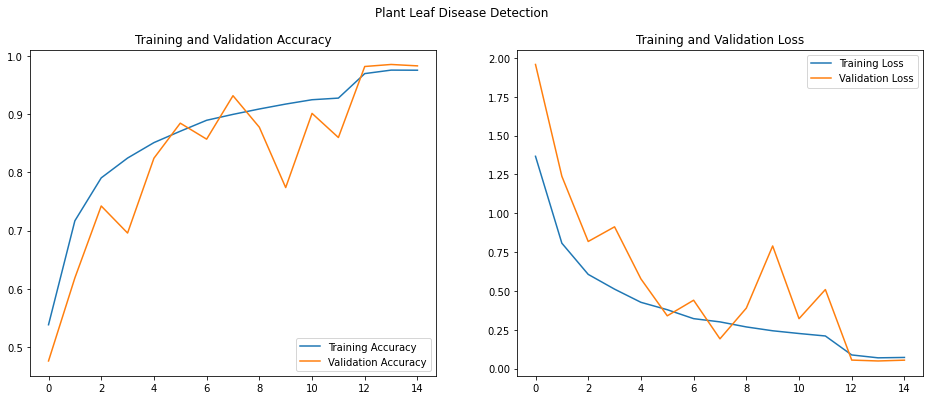

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = history.epoch

plt.figure(figsize = (16, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

plt.suptitle('Plant Leaf Disease Detection')

plt.savefig('acc_and_loss.jpg', dpi = 1000, bbox_inches='tight')
plt.show()

**Test Data Images**

In [16]:
# test_image_data = []
# test_image_filenames = []

# for img_name in os.listdir(TEST_DIR):
#     img = load_img(os.path.join(TEST_DIR, img_name), target_size = IMG_SHAPE)
#     test_image_data.append(img_to_array(img, dtype = 'uint8'))
#     test_image_filenames.append(img_name)
#     print(img_name)
    
# test_image_data = np.array(test_image_data)/255
# print(f'\nTotal testing images: {len(test_image_data)}')

In [17]:
# plt.subplots(nrows = 3, ncols = 4, figsize = (20, 15))

# for i in range(12):
#     plt.subplot(3, 4, i + 1)
#     plt.axis(False)
#     plt.grid(False)
#     plt.imshow(test_image_data[i])
#     plt.title(f"True: {test_image_filenames[i][:-4]}\nPrediction:{test_image_data[i]}")

# plt.show()

**Test Data**

In [18]:
val_image_gen = ImageDataGenerator(rescale = 1./255,
        rotation_range = 15,
        width_shift_range = 0.05,
        height_shift_range = 0.05,
        shear_range = 0.05,
        zoom_range = 0.05,
        horizontal_flip = True,
        vertical_flip = True,
        fill_mode = 'reflect')
Test_data_gen = val_image_gen.flow_from_directory(
        batch_size = BATCH_SIZE,
        directory = TEST_DIR,
        shuffle = True,
        target_size = IMG_SHAPE
    )

Found 90 images belonging to 10 classes.


**Evaluation Metrics**

In [19]:
total_classes = len(os.listdir(TRAIN_DIR))
print(f'\nTotal number of classes: {total_classes}')
class_name_lookup = {name: index for index, name in train_data.class_indices.items()}
for k, v in class_name_lookup.items():
    print(f"{k:2} : {v}")


Total number of classes: 10
 0 : Tomato___Bacterial_spot
 1 : Tomato___Early_blight
 2 : Tomato___Late_blight
 3 : Tomato___Leaf_Mold
 4 : Tomato___Septoria_leaf_spot
 5 : Tomato___Spider_mites Two-spotted_spider_mite
 6 : Tomato___Target_Spot
 7 : Tomato___Tomato_Yellow_Leaf_Curl_Virus
 8 : Tomato___Tomato_mosaic_virus
 9 : Tomato___healthy


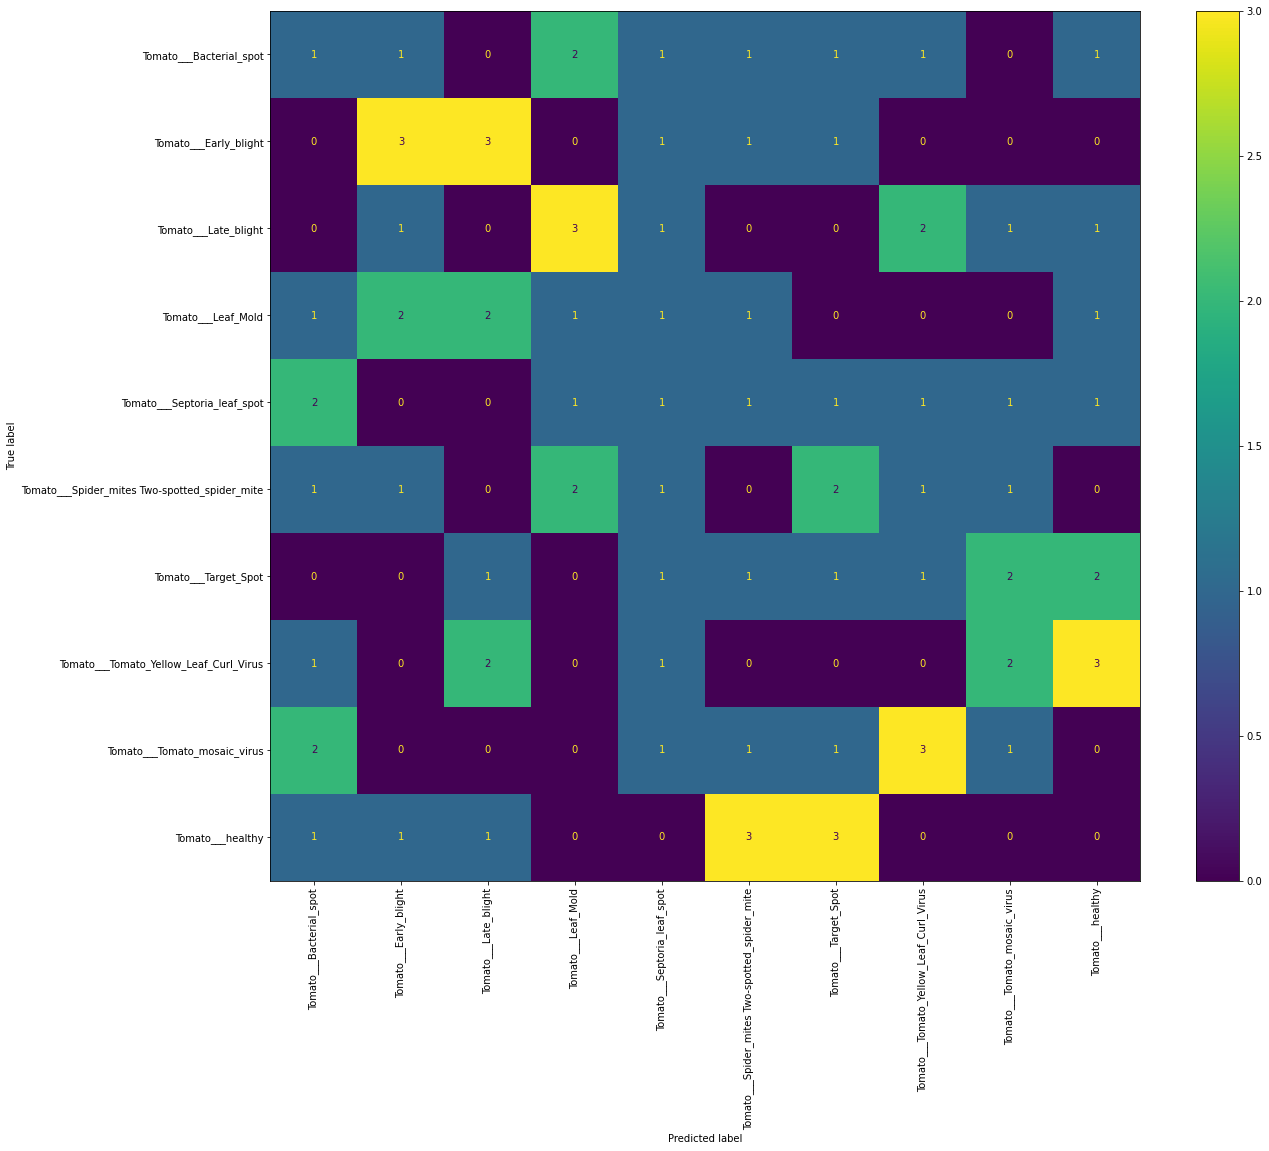

In [20]:
val_true = Test_data_gen.classes
val_pred = np.argmax(model.predict(Test_data_gen), axis = 1)

_, ax = plt.subplots(figsize = (20, 16))

ConfusionMatrixDisplay(confusion_matrix(val_true, val_pred, labels = list(class_name_lookup.keys())),
                        display_labels = list(class_name_lookup.values())
                        ).plot(ax = ax, xticks_rotation = 'vertical')
                        
plt.savefig('confusion_matrix.jpg', dpi = 1000, bbox_inches = 'tight')
plt.show()

**Summary of Evaluation Metrics**

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred= model.predict(Test_data_gen)
y_pred=np.argmax(y_pred,axis=1)
print(classification_report(y_pred,Test_data_gen.classes))
cf = confusion_matrix(y_pred,Test_data_gen.classes)

              precision    recall  f1-score   support

           0       0.22      0.22      0.22         9
           1       0.11      0.10      0.11        10
           2       0.00      0.00      0.00         8
           3       0.11      0.11      0.11         9
           4       0.22      0.22      0.22         9
           5       0.11      0.11      0.11         9
           6       0.00      0.00      0.00         9
           7       0.11      0.11      0.11         9
           8       0.00      0.00      0.00         9
           9       0.11      0.11      0.11         9

    accuracy                           0.10        90
   macro avg       0.10      0.10      0.10        90
weighted avg       0.10      0.10      0.10        90

